# **Week 12. Homework 8. Pandas**



---



---



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1. Load the dataset into a pandas DataFrame and display the first few rows.

In [ ]:
data = pd.read_csv("Startups (2).csv")

data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39




---



---




2. Find the number of rows and columns in the dataset.




In [ ]:
rows, columns = data.shape
print(f"Rows: {rows}\nColumns: {columns}")

Rows: 50
Columns: 5





---


---



3. Check for missing values in each column and handle them appropriately.




In [ ]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64




---


---



4. Calculate the mean, median, and standard deviation of the 'R&D_Spend' column.



In [ ]:
data['R&D Spend'].describe()

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64




---


---



5. Filter and create a new DataFrame containing companies located in a **California**.



In [ ]:
cali = data[data['State'] == 'California']
cali.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
6,134615.46,147198.87,127716.82,California,156122.51
9,123334.88,108679.17,304981.62,California,149759.96
11,100671.96,91790.61,249744.55,California,144259.40
13,91992.39,135495.07,252664.93,California,134307.35





---


---



6. Sort the dataset by 'Profit' in descending order.



In [ ]:
sort_profit = data.sort_values('Profit', ascending=False)
sort_profit.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94





---


---



7. Group the data by 'State' and calculate the total 'Profit' for each state.



In [ ]:
state_prof = data.groupby('State').agg({'Profit':'sum'}).reset_index()
state_prof

,State,Profit
0,California,1766387.98
1,Florida,1900384.39
2,New York,1933859.59





---


---



8. Create a bar chart to visualize the total 'Profit' by 'State.'



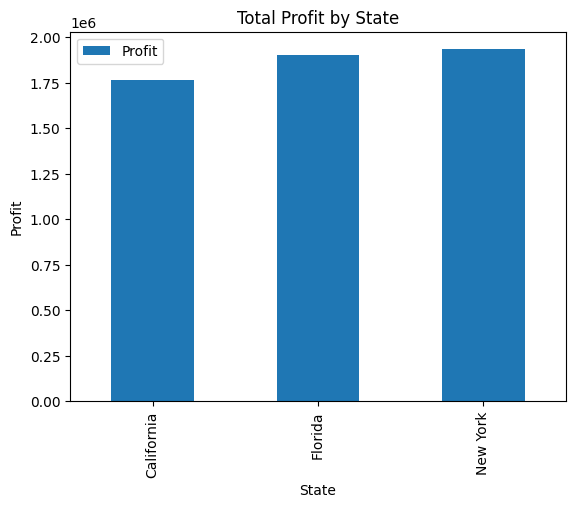

In [ ]:
state_prof.plot(x='State', y='Profit', kind='bar')

plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Profit')

plt.show()




---


---



9. Calculate the correlation between 'R&D_Spend' and 'Profit.'



In [ ]:
print(data['R&D Spend'].corr(data['Profit']))

0.9729004656594832




---



---



---



10. Create a new column 'Total_Spend' that represents the sum of 'R&D_Spend,' 'Administration,' and 'Marketing_Spend' for each company.



In [ ]:
data['Total_Spend'] = data['R&D Spend'] + data['Administration'] + data['Marketing Spend']
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


11. Calculate the average **R&D_Spend**, **Administration**, and **Marketing_Spend** for companies located in each **State**



In [ ]:
state_spend = data.groupby('State').agg({'R&D Spend':'mean',
                                         'Administration': 'mean',
                                         'Marketing Spend': 'mean'}).reset_index()

state_spend.head(5)

,State,R&D Spend,Administration,Marketing Spend
0,California,64657.674118,120746.507059,182540.929412
1,Florida,80724.016250,121768.897500,247323.551250
2,New York,76195.062353,121543.470588,205346.015882




---



---



12. Create a histogram to visualize the distribution of 'Profit.'



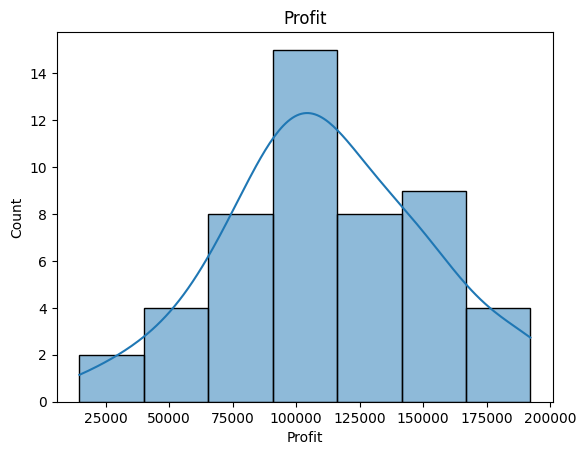

In [ ]:
import seaborn as sns

sns.histplot(data['Profit'], kde=True)
plt.title('Profit')

plt.show()



---



---



13. Filter the dataset to include only companies with 'R&D_Spend' greater than a 12000.



In [ ]:
big_RD = data[data['R&D Spend'] > 12000]

big_RD['R&D Spend'].min() ## Print the min to ensure >12000

15505.73



---



---



14. Calculate the total 'Profit' for companies with 'Marketing_Spend' above a certain threshold.



In [ ]:
threshold = 100000 # set a threshold
total_prof = 0 # create a variable for the total profit

prof_MS = data[data['Marketing Spend'] > threshold]

for p in prof_MS['Profit']:
  total_prof+=p

print(f"Total Profit = {total_prof}")

Total Profit = 4890206.18


15. Replace any missing values in the 'Marketing_Spend' column with the mean spending of the dataset.



In [ ]:
data['Marketing Spend'].replace(np.NaN, data['Marketing Spend'].mean())
data

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97
6,134615.46,147198.87,127716.82,California,156122.51,409531.15
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76
9,123334.88,108679.17,304981.62,California,149759.96,536995.67





---


---



16. Create a new column 'Profit_Margin' that represents the profit margin for each company (Profit / Total_Spend).



In [ ]:
data['Profit Margin'] = data['Profit']/data['Total_Spend']
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,Profit Margin
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,0.248390
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,0.253066
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,0.288369
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88,0.283023
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53,0.277133




---



---



---



17. Sort the dataset by 'Profit_Margin' in descending order.



In [ ]:
pm_sort = data.sort_values('Profit Margin', ascending=False)
pm_sort.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,Profit Margin
48,542.05,51743.15,0.00,New York,35673.41,52285.20,0.682285
19,86419.70,153514.11,0.00,New York,122776.86,239933.81,0.511711
45,1000.23,124153.04,1903.93,New York,64926.08,127057.20,0.510999
32,63408.86,129219.61,46085.25,California,97427.84,238713.72,0.408137
43,15505.73,127382.30,35534.17,New York,69758.98,178422.20,0.390977
6,134615.46,147198.87,127716.82,California,156122.51,409531.15,0.381223
30,61994.48,115641.28,91131.24,Florida,99937.59,268767.00,0.371837
24,77044.01,99281.34,140574.81,New York,108552.04,316900.16,0.342543
10,101913.08,110594.11,229160.95,Florida,146121.95,441668.14,0.330841
11,100671.96,91790.61,249744.55,California,144259.40,442207.12,0.326226




---



---



18. Calculate the average profit margin for companies in each 'State' and create a bar chart to display it.



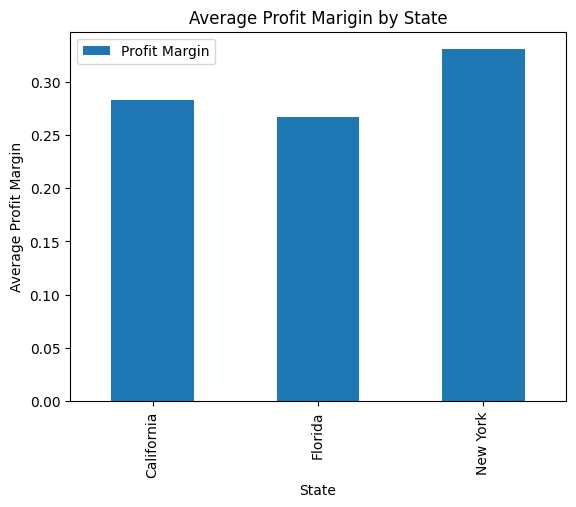

In [ ]:
state_PM = data.groupby('State').agg({'Profit Margin':'mean'}).reset_index()

state_PM.plot(x='State',y='Profit Margin',kind='bar')

plt.title('Average Profit Marigin by State')
plt.xlabel('State')
plt.ylabel('Average Profit Margin')

plt.show()



---



---



---



19. Find the maximum 'R&D_Spend' in each **State**.



In [ ]:
maxRD_state = data.groupby('State').agg({'R&D Spend':'max'}).reset_index()
maxRD_state

,State,R&D Spend
0,California,162597.70
1,Florida,153441.51
2,New York,165349.20
